In [1]:
'''
Make a figure analogous to Figure 2.6 for the non-stationary case outlined in Exercise 2.5.
Include the constant-step-size ε-greedy algorithm with α = 0.1.
Use runs of 200,000 steps and, as a performance measure for each algorithm and parameter setting,
use the average reward over the last 100,000 steps.
'''

'\nMake a figure analogous to Figure 2.6 for the non-stationary case outlined in Exercise 2.5.\nInclude the constant-step-size ε-greedy algorithm with α = 0.1.\nUse runs of 200,000 steps and, as a performance measure for each algorithm and parameter setting,\nuse the average reward over the last 100,000 steps.\n'

In [2]:
'''
Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems.
Use a modified version of the 10-armed testbed in which all the q∗(a) start out equal and then take independent random walks
(say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the q∗(a) on each step).
Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed,
and another action-value method using a constant step-size parameter, α = 0.1. Use ε = 0.1 and longer runs, say of n steps.
'''

'\nDesign and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems.\nUse a modified version of the 10-armed testbed in which all the q∗(a) start out equal and then take independent random walks\n(say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the q∗(a) on each step).\nPrepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed,\nand another action-value method using a constant step-size parameter, α = 0.1. Use ε = 0.1 and longer runs, say of n steps.\n'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class algorithm:
    
    def __new__(cls, k:int, alpha, *args, **kwargs):
        print(f"Succeessfully created {cls.__name__} model!")
        return super().__new__(cls)
    
    def __init__(self, k:int, alpha):
        
        self.k = k
        self.alpha = alpha
        self.q = np.zeros(k)
        
        self.Q = np.zeros(self.k)
        self.R_sum = 0
        self.R_avg = []
        
    def update_q(self):
        self.q = self.q + np.random.normal(0, 0.01, self.k)    # random walk
        
    def update_Q(self):
        pass
        
    def choose_action(self):
        return np.random.choice(len(self.Q))
    
    def optimate_algorithm(self, n:int):
        
        for i in range(n):
            
            self.update_q()
            self.A = self.choose_action()
            self.reward = np.random.normal(loc=self.q[self.A], scale=1, size=1)
            self.R_sum += self.reward
            self.R_avg.append(self.R_sum / (i+1))

In [5]:
k = 10   # number of arms
alpha = 0.1   # constant step-size parameter
n = 200000  # number of steps

### $\epsilon$-greedy

In [6]:
class epsilon_greedy(algorithm):
        
    def __init__(self, k, alpha, epsilon):
        
        super().__init__(k, alpha)
        self.epsilon = epsilon
        
    def choose_action(self):
        
        if np.random.rand() < self.epsilon:
            return np.random.randint(k)
        else:
            return np.argmax(self.Q)
    
    def update_Q(self):
        a = self.choose_action()
        self.Q[a] += (self.reward - self.Q[a]) * self.alpha
        
    def optimate_algorithm(self, n:int):
        
        for i in range(n):
            
            self.update_q()
            self.A = self.choose_action()
            self.reward = np.random.normal(loc=self.q[self.A], scale=1, size=1)
            self.update_Q()
            self.R_sum += self.reward
            self.R_avg.append(self.R_sum / (i+1))

In [7]:
model1 = epsilon_greedy(k, alpha, 0.1)
model1.optimate_algorithm(n)

Succeessfully created epsilon_greedy model!


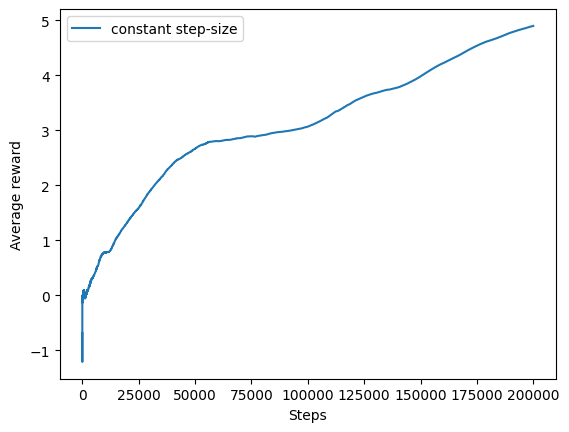

In [8]:
plt.plot(model1.R_avg, label='constant step-size')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

### greedy with optimistic initialization α = 0.1

In [9]:
class optimistic_initialization_greedy(algorithm):
    
    def __init__(self, k, alpha, initial):
        
        super().__init__(k, alpha)
        self.Q = np.ones(self.k) * initial
        
    def choose_action(self):
        
        return np.argmax(self.Q)
    
    def update_Q(self):
        
        a = self.choose_action()
        self.Q[a] += (self.reward - self.Q[a]) * self.alpha
        
    def optimate_algorithm(self, n:int):
        
        for i in range(n):
            
            self.update_q()
            self.A = self.choose_action()
            self.reward = np.random.normal(loc=self.q[self.A], scale=1, size=1)
            self.update_Q()
            self.R_sum += self.reward
            self.R_avg.append(self.R_sum / (i+1))

In [10]:
model2 = optimistic_initialization_greedy(k, alpha, 5)
model2.optimate_algorithm(n)

Succeessfully created optimistic_initialization_greedy model!


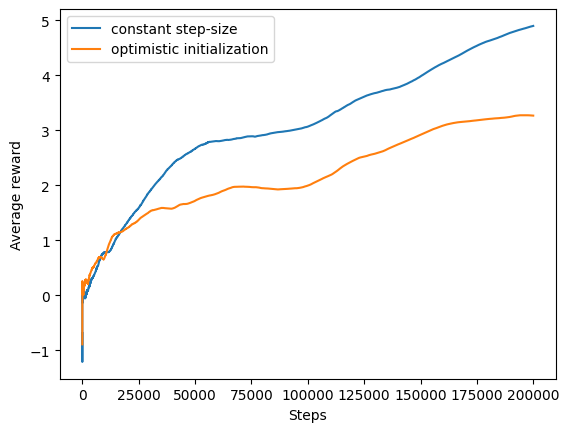

In [11]:
plt.plot(model1.R_avg, label='constant step-size')
plt.plot(model2.R_avg, label='optimistic initialization')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

### UCB

In [12]:
class UCB(algorithm):
    
    def __init__(self, k, alpha, c):
        
        super().__init__(k, alpha)
        self.c = c
        self.N = np.zeros(self.k)
        
    def choose_action(self):
        
        for i in range(self.k):
            
            if self.N[i] == 0:
                
                return i
            
        return np.argmax(self.Q + self.c * np.sqrt(np.log(np.sum(self.N)) / self.N))
    
    def update_Q(self):
    
        a = self.choose_action()
        self.Q[a] += (self.reward - self.Q[a]) * self.alpha
        
    def optimate_algorithm(self, n:int):
        
        for i in range(n):
            
            self.update_q()
            self.A = self.choose_action()
            self.reward = np.random.normal(loc=self.q[self.A], scale=1, size=1)
            self.N[self.A] += 1
            self.update_Q()
            self.R_sum += self.reward
            self.R_avg.append(self.R_sum / (i+1))

In [13]:
model3 = UCB(k, alpha, 2)
model3.optimate_algorithm(n)

Succeessfully created UCB model!


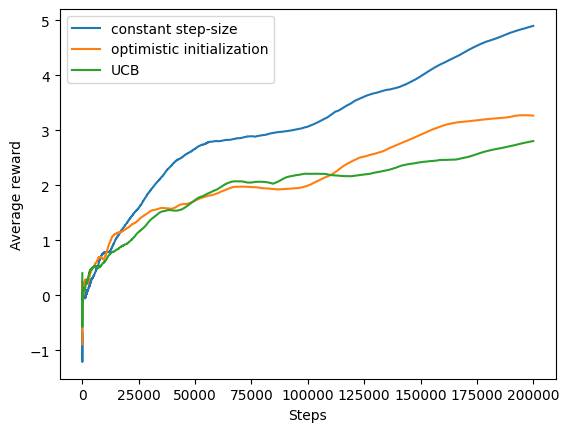

In [14]:
plt.plot(model1.R_avg, label='constant step-size')
plt.plot(model2.R_avg, label='optimistic initialization')
plt.plot(model3.R_avg, label='UCB')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

### gradient bandit

In [15]:
class gradient_bandit(algorithm):
    
    def __init__(self, k, alpha, Q):
            
            super().__init__(k, alpha)
            self.H = np.zeros(self.k)
            self.pi = np.zeros(self.k)
            self.Q = np.zeros(self.k) + Q
            
    def softmax(self):
        
        self.pi = np.exp(self.H) / np.sum(np.exp(self.H))
        
    def choose_action(self):
        
        self.softmax()
        return np.random.choice(self.k, p=self.pi)
    
    def update_H(self):
            
        self.H[self.A] += self.alpha * (self.reward - self.R_avg[-1]) * (1 - self.pi[self.A])
        self.H[np.arange(self.k) != self.A] -= self.alpha * (self.reward - self.R_avg[-1]) * self.pi[np.arange(self.k) != self.A]
        
    def optimate_algorithm(self, n:int):
        
        for i in range(n):
            
            self.update_q()
            self.A = self.choose_action()
            self.reward = np.random.normal(loc=self.q[self.A], scale=1, size=1)
            self.R_sum += self.reward
            self.R_avg.append(self.R_sum / (i+1))
            self.update_H()

In [16]:
model4 = gradient_bandit(k, alpha, 0)
model4.optimate_algorithm(n)

Succeessfully created gradient_bandit model!


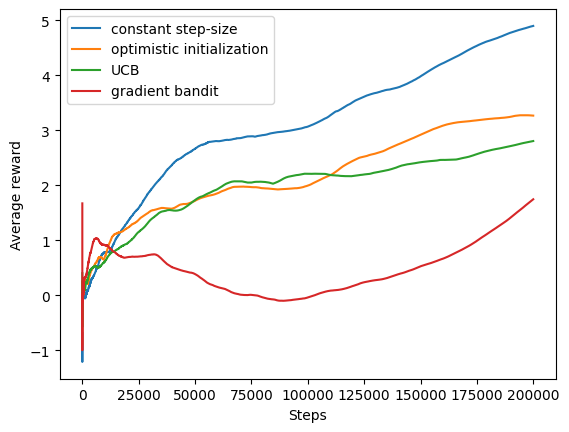

In [17]:
plt.plot(model1.R_avg, label='constant step-size')
plt.plot(model2.R_avg, label='optimistic initialization')
plt.plot(model3.R_avg, label='UCB')
plt.plot(model4.R_avg, label='gradient bandit')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

In fact, $q$ of the above code is updated randomly according to the normal distribution, resulting in different real reward vectors of each model.

In [18]:
class algorithm:
    
    def __new__(cls, k:int, alpha, *args, **kwargs):
        print(f"Succeessfully created {cls.__name__} model!")
        return super().__new__(cls)
    
    def __init__(self, k:int, alpha):
        
        self.k = k
        self.alpha = alpha
        
        self.Q = np.zeros(self.k)
        self.R_sum = 0
        self.R_avg = 0
        
    def update_Q(self):
        pass
        
    def choose_action(self):
        return np.random.choice(len(self.Q))
    
    def update(self, q, n:int, bound):
            
        self.A = self.choose_action()
        self.reward = np.random.normal(loc=q[self.A], scale=1, size=1)
        
        if n >= bound:
            self.R_sum += self.reward
            self.R_avg = self.R_sum / bound

In [19]:
class epsilon_greedy(algorithm):
        
    def __init__(self, k, alpha, epsilon):
        
        super().__init__(k, alpha)
        self.epsilon = epsilon
        
    def choose_action(self):
        
        if np.random.rand() < self.epsilon:
            return np.random.randint(k)
        else:
            return np.argmax(self.Q)
    
    def update_Q(self):
        a = self.choose_action()
        self.Q[a] += (self.reward - self.Q[a]) * self.alpha
        
    def update(self, q, n:int, bound):
            
        self.A = self.choose_action()
        self.reward = np.random.normal(loc=q[self.A], scale=1, size=1)
        self.update_Q()
        
        if n >= bound:
            self.R_sum += self.reward
            self.R_avg = self.R_sum / bound

In [20]:
class optimistic_initialization_greedy(algorithm):
    
    def __init__(self, k, alpha, initial):
        
        super().__init__(k, alpha)
        self.Q = np.ones(self.k) * initial
        
    def choose_action(self):
        
        return np.argmax(self.Q)
    
    def update_Q(self):
        
        a = self.choose_action()
        self.Q[a] += (self.reward - self.Q[a]) * self.alpha
        
    def update(self, q, n:int, bound):
            
        self.A = self.choose_action()
        self.reward = np.random.normal(loc=q[self.A], scale=1, size=1)
        self.update_Q()  
        
        if n >= bound:
            self.R_sum += self.reward
            self.R_avg = self.R_sum / bound

In [21]:
class UCB(algorithm):
    
    def __init__(self, k, alpha, c):
        
        super().__init__(k, alpha)
        self.c = c
        self.N = np.zeros(self.k)
        
    def choose_action(self):
        
        for i in range(self.k):
            
            if self.N[i] == 0:
                
                return i
            
        return np.argmax(self.Q + self.c * np.sqrt(np.log(np.sum(self.N)) / self.N))
    
    def update_Q(self):
    
        a = self.choose_action()
        self.Q[a] += (self.reward - self.Q[a]) * self.alpha
        
    def update(self, q, n:int, bound):

        self.A = self.choose_action()
        self.reward = np.random.normal(loc=q[self.A], scale=1, size=1)
        self.N[self.A] += 1
        self.update_Q()

        if n >= bound:
            self.R_sum += self.reward
            self.R_avg = self.R_sum / bound

In [22]:
class gradient_bandit(algorithm):
    
    def __init__(self, k, alpha, Q):
            
            super().__init__(k, alpha)
            self.R_avg = []
            self.R_sum_bound = 0
            self.R_avg_bound = 0
            
            self.H = np.zeros(self.k)
            self.pi = np.zeros(self.k)
            self.Q = np.zeros(self.k) + Q
            
    def softmax(self):
        
        self.pi = np.exp(self.H) / np.sum(np.exp(self.H))
        
    def choose_action(self):
        
        self.softmax()
        return np.random.choice(self.k, p=self.pi)
    
    def update_H(self):
            
        self.H[self.A] += self.alpha * (self.reward - self.R_avg[-1]) * (1 - self.pi[self.A])
        self.H[np.arange(self.k) != self.A] -= self.alpha * (self.reward - self.R_avg[-1]) * self.pi[np.arange(self.k) != self.A]
        
    def update(self, q, n:int, bound):

        self.A = self.choose_action()
        self.reward = np.random.normal(loc=q[self.A], scale=1, size=1)
        self.R_sum += self.reward
        self.R_avg.append(self.R_sum / (n+1))
        self.update_H()
        
        if n >= bound:
            self.R_sum_bound += self.reward
            self.R_avg_bound = self.R_sum / bound

In [50]:
k = 10
alpha = 0.1
n = 200000
q = np.zeros(k)

bound = 100000

model1_R_avg = []
model2_R_avg = []
model3_R_avg = []
model4_R_avg = []

for parameter in np.exp2(np.arange(-7, 7, step=1)):
    
    model1 = epsilon_greedy(k, alpha, parameter)
    model2 = optimistic_initialization_greedy(k, alpha, parameter)
    model3 = UCB(k, alpha, parameter)
    model4 = gradient_bandit(k, alpha, parameter)

    for i in range(n):
        
        q += np.random.normal(0, 0.01, k)
        
        model1.update(q, i, bound)
        model2.update(q, i, bound)
        model3.update(q, i, bound)
        model4.update(q, i, bound)
        
    model1_R_avg.append(model1.R_avg)
    model2_R_avg.append(model2.R_avg)
    model3_R_avg.append(model3.R_avg)
    model4_R_avg.append(model4.R_avg_bound)

Succeessfully created epsilon_greedy model!
Succeessfully created optimistic_initialization_greedy model!
Succeessfully created UCB model!
Succeessfully created gradient_bandit model!
Succeessfully created epsilon_greedy model!
Succeessfully created optimistic_initialization_greedy model!
Succeessfully created UCB model!
Succeessfully created gradient_bandit model!
Succeessfully created epsilon_greedy model!
Succeessfully created optimistic_initialization_greedy model!
Succeessfully created UCB model!
Succeessfully created gradient_bandit model!
Succeessfully created epsilon_greedy model!
Succeessfully created optimistic_initialization_greedy model!
Succeessfully created UCB model!
Succeessfully created gradient_bandit model!
Succeessfully created epsilon_greedy model!
Succeessfully created optimistic_initialization_greedy model!
Succeessfully created UCB model!
Succeessfully created gradient_bandit model!
Succeessfully created epsilon_greedy model!
Succeessfully created optimistic_ini

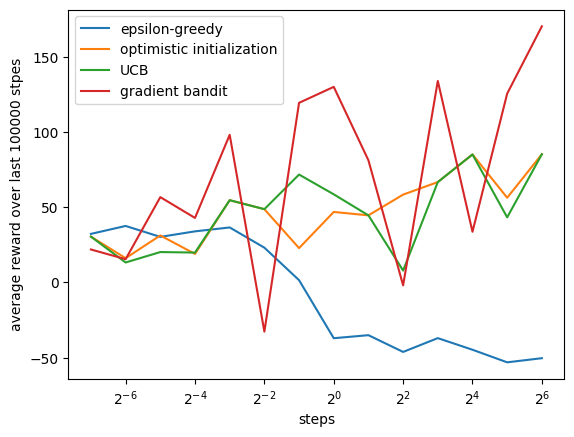

In [51]:
list = np.exp2(np.arange(-7, 7, step=1))
    
plt.plot(list, model1_R_avg, label="epsilon-greedy")
plt.plot(list, model2_R_avg, label="optimistic initialization")
plt.plot(list, model3_R_avg, label="UCB")
plt.plot(list, model4_R_avg, label="gradient bandit")
plt.xscale("log", base=2)
plt.xlabel("steps")
plt.ylabel("average reward over last 100000 stpes")
plt.legend()
plt.show()